# Helper Functions

In [77]:
def plot_statistic(to_show, y_scale, ext, title):
    plt.title(title)
    plt.imshow(to_show, aspect='auto', origin='lower', extent=ext, cmap=cm.RdBu_r)
    plt.ylabel('Frequencies [Hz]')
    plt.xlabel('time [ms]')
    tick_positions = [1,5,10,15,20,25,30,35,40,45,50]
    ticks = [round(y_scale[i*2 - 1],2) for i in range(len(y_scale)) if i in tick_positions]
    plt.yticks(tick_positions, ticks)
    plt.colorbar()
    plt.show()

# Load Data

In [78]:
import osfclient
import mne
import mne_bids
import numpy as np
import scipy
import ccs_eeg_utils
import ccs_eeg_semesterproject
import itertools
from mne_bids import (BIDSPath,read_raw_bids)
from matplotlib import pyplot as plt
from importlib import reload 
from matplotlib import cm

from helper_functions import *

%matplotlib qt
path = "../local/bidsN170"
temp_path = "/ses-N170/eeg/"
sub = '001'

# INFO, WARNING
mne.set_log_level(verbose='INFO')

In [3]:
# pip install cmcrameri

In [4]:
read_path = path + "/sub-" + sub + temp_path + "sub-" + sub +"_cleaned.fif"
raw = mne.io.read_raw_fif(read_path)

epochs, events = load_epochs(raw)
epochs.drop_bad()

Opening raw data file ../local/bidsN170/sub-001/ses-N170/eeg/sub-001_cleaned.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 30) active
    Range : 0 ... 699391 =      0.000 ...   682.999 secs
Ready.
Used Annotations descriptions: ['response:201', 'response:202', 'stimulus:1', 'stimulus:10', 'stimulus:101', 'stimulus:102', 'stimulus:103', 'stimulus:104', 'stimulus:105', 'stimulus:106', 'stimulus:107', 'stimulus:108', 'stimulus:109', 'stimulus:11', 'stimulus:110', 'stimulus:111', 'stimulus:112', 'stimulus:113', 'stimulus:114', 'stimulus:115', 'stimulus:116', 'stimulus:117', 'stimulus:118', 'stimulus:119', 'stimulus:12', 'stimulus:120', 'stimulus:121', 'stimulus:122', 'stimulus:123', 'stimulus:124', 'stimulus:125', 'stimulus:126', 'stimulus:127', 'stimulus:128', 'stimulus:129', 'stimulus:13', 'stimulus:130', 'stimulus:131', 'stimulus:132', 'stimulus:133', 'stimulus:134', 'stimulus:135', 'stimulus:136', 'stimulus:137', 'stimulus:138', 'stimulus:139', 'sti

<ipython-input-4-3bec74d7b56f>:2: RuntimeWarning: This filename (../local/bidsN170/sub-001/ses-N170/eeg/sub-001_cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(read_path)


0 bad epochs dropped


<Epochs |  319 events (all good), -0.5 - 1 sec, baseline [-0.5, 0] sec, ~54 kB, data not loaded,
 'stimulus:1': 2
 'stimulus:10': 2
 'stimulus:101': 2
 'stimulus:102': 2
 'stimulus:103': 2
 'stimulus:104': 2
 'stimulus:105': 2
 'stimulus:106': 2
 'stimulus:107': 2
 'stimulus:108': 1
 'stimulus:109': 2
 'stimulus:11': 2
 'stimulus:110': 2
 'stimulus:111': 2
 'stimulus:112': 2
 'stimulus:113': 2
 'stimulus:114': 2
 'stimulus:115': 2
 'stimulus:116': 2
 'stimulus:117': 2
 'stimulus:118': 2
 'stimulus:119': 2
 'stimulus:12': 2
 'stimulus:120': 2
 'stimulus:121': 2
 'stimulus:122': 2
 'stimulus:123': 2
 'stimulus:124': 2
 'stimulus:125': 2
 'stimulus:126': 2
 'stimulus:127': 2
 'stimulus:128': 2
 'stimulus:129': 2
 'stimulus:13': 2
 'stimulus:130': 2
 'stimulus:131': 2
 'stimulus:132': 2
 'stimulus:133': 2
 'stimulus:134': 2
 'stimulus:135': 2
 'stimulus:136': 2
 'stimulus:137': 2
 'stimulus:138': 2
 'stimulus:139': 2
 'stimulus:14': 2
 'stimulus:140': 2
 'stimulus:141': 2
 'stimulus:142': 

In [ ]:
#plt.plot((events[:, 0] - raw.first_samp) / raw.info['sfreq'], events[:, 2], '.');
#plt.xlabel('time (s)')

In [ ]:
# extract the different stimuli and conditions
evoked_face_normal = epochs[["stimulus:{}".format(k) for k in range(1,41)]].average()
evoked_car_normal = epochs[["stimulus:{}".format(k) for k in range(41,81)]].average()
evoked_face_scrambled = epochs[["stimulus:{}".format(k) for k in range(101,141)]].average()
evoked_car_scrambled = epochs[["stimulus:{}".format(k) for k in range(141,181)]].average()

In [ ]:
times = np.linspace(0.13, 0.2, 5)
fig = evoked_face_normal.plot_topomap(times=times, title='evoked normal faces')
fig = evoked_car_normal.plot_topomap(times=times, title='evoked normal cars')
fig = evoked_face_scrambled.plot_topomap(times=times, title='evoked scrambled faces')
fig = evoked_car_scrambled.plot_topomap(times=times, title='evoked scrambled cars')

# Time Frequency Analysis

In [84]:
epochs.load_data()
intact_faces_epochs = epochs[["stimulus:{}".format(k) for k in range(1,41)]] #.pick_channels(["P7"])
scrambled_faces_epochs = epochs[["stimulus:{}".format(k) for k in range(101,141)]] #.pick_channels(["P7"])
intact_cars_epochs = epochs[["stimulus:{}".format(k) for k in range(41,81)]] #.pick_channels(["P7"])
scrambled_cars_epochs = epochs[["stimulus:{}".format(k) for k in range(141,181)]] #.pick_channels(["P7"])

new_range = itertools.chain(range(101,141), range(41,81), range(141,181))
all_but_if_epochs = epochs[["stimulus:{}".format(k) for k in new_range]]

Loading data for 320 events and 1537 original time points ...


# 1. For one subject

In [88]:
freqs = np.logspace(*np.log10([0.1, 50]), num=100)
n_cycles = freqs/2
baseline = [-0.2,0]
vmin = -4
vmax = 4
vmin = None
vmax = None

## choose stimulus

In [89]:
epochs_induced_if = intact_faces_epochs.copy()
epochs_induced_sf = scrambled_faces_epochs.copy()
epochs_induced_ic = intact_cars_epochs.copy()
epochs_induced_sc = scrambled_cars_epochs.copy()
epochs_induced_all = epochs.copy()
epochs_induced_all_but_if = all_but_if_epochs.copy()

In [90]:
epochs_induced_if.subtract_evoked()
epochs_induced_sf.subtract_evoked()
epochs_induced_ic.subtract_evoked()
epochs_induced_sc.subtract_evoked()
epochs_induced_all.subtract_evoked()
epochs_induced_all_but_if.subtract_evoked()

Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: VEOG_lower, HEOG_right, HEOG_left
[done]
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: VEOG_lower, HEOG_right, HEOG_left
[done]
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: VEOG_lower, HEOG_right, HEOG_left
[done]
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: VEOG_lower, HEOG_right, HEOG_left
[done]
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: VEOG_lower, HEOG_right, HEOG_left
[done]
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: VEOG_lower, HEOG_right, HEOG_left
[done]


<Epochs |  240 events (all good), -0.5 - 1 sec, baseline [-0.5, 0] sec, ~92.9 MB, data loaded,
 'stimulus:101': 2
 'stimulus:102': 2
 'stimulus:103': 2
 'stimulus:104': 2
 'stimulus:105': 2
 'stimulus:106': 2
 'stimulus:107': 2
 'stimulus:108': 2
 'stimulus:109': 2
 'stimulus:110': 2
 'stimulus:111': 2
 'stimulus:112': 2
 'stimulus:113': 2
 'stimulus:114': 2
 'stimulus:115': 2
 'stimulus:116': 2
 'stimulus:117': 2
 'stimulus:118': 2
 'stimulus:119': 2
 'stimulus:120': 2
 'stimulus:121': 2
 'stimulus:122': 2
 'stimulus:123': 2
 'stimulus:124': 2
 'stimulus:125': 2
 'stimulus:126': 2
 'stimulus:127': 2
 'stimulus:128': 2
 'stimulus:129': 2
 'stimulus:130': 2
 'stimulus:131': 2
 'stimulus:132': 2
 'stimulus:133': 2
 'stimulus:134': 2
 'stimulus:135': 2
 'stimulus:136': 2
 'stimulus:137': 2
 'stimulus:138': 2
 'stimulus:139': 2
 'stimulus:140': 2
 'stimulus:141': 2
 'stimulus:142': 2
 'stimulus:143': 2
 'stimulus:144': 2
 'stimulus:145': 2
 'stimulus:146': 2
 'stimulus:147': 2
 'stimulus:1

## Power Total

In [91]:
power_total = mne.time_frequency.tfr_morlet(epochs, 
                        freqs=freqs, n_cycles=n_cycles, return_itc=False,n_jobs=4,average=True)#,picks='Cz')

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   45.6s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  1.5min finished


In [93]:
%matplotlib qt
power_total.plot_topo(baseline=baseline,mode='percent',vmin=vmin,vmax=vmax);

Applying baseline correction (mode: percent)


C:\Users\Kay\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:224: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
C:\Users\Kay\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:224: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)
C:\Users\Kay\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:224: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
C:\Users\Kay\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:224: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)
C:\Users\Kay\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:224: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
C:\Users\Kay\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:224: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)
C:\Users\Kay\anaconda3\lib\site-pa

# Induced 

In [ ]:
power_induced_if = mne.time_frequency.tfr_morlet(epochs_induced_if, freqs=freqs, 
                            n_cycles=n_cycles, return_itc=False,n_jobs=4,average=True)#,picks="P7")

In [ ]:
power_induced_all_but_if = mne.time_frequency.tfr_morlet(epochs_induced_all_but_if, freqs=freqs, 
                            n_cycles=n_cycles, return_itc=False,n_jobs=4,average=True)#,picks="P7")

In [ ]:
power_induced_sf = mne.time_frequency.tfr_morlet(epochs_induced_sf, freqs=freqs, 
                            n_cycles=n_cycles, return_itc=False,n_jobs=4,average=True)#,picks="P7")
power_induced_ic = mne.time_frequency.tfr_morlet(epochs_induced_ic, freqs=freqs, 
                            n_cycles=n_cycles, return_itc=False,n_jobs=4,average=True)#,picks="P7")
power_induced_sc = mne.time_frequency.tfr_morlet(epochs_induced_sc, freqs=freqs, 
                            n_cycles=n_cycles, return_itc=False,n_jobs=4,average=True)#,picks="P7")

## bands for induced intact faces

In [ ]:
%matplotlib qt
fig, axis = plt.subplots(1, 5, figsize=(7, 4))
power_induced_if.plot_topomap(tmin=0.13, tmax=0.2, fmin=8, fmax=12,
                   baseline=baseline, mode='logratio', axes=axis[0],
                   title='Alpha', show=False)
power_induced_if.plot_topomap(tmin=0.13, tmax=0.2, fmin=13, fmax=25,
                   baseline=baseline, mode='logratio', axes=axis[1],
                   title='Beta', show=False)
power_induced_if.plot_topomap(tmin=0.13, tmax=0.2, fmin=26, fmax=40,
                   baseline=baseline, mode='logratio', axes=axis[2],
                   title='Gamma', show=False)
power_induced_if.plot_topomap(tmin=0.13, tmax=0.2, fmin=1, fmax=4,
                   baseline=baseline, mode='logratio', axes=axis[3],
                   title='Delta', show=False)
power_induced_if.plot_topomap(tmin=0.13, tmax=0.2, fmin=4, fmax=8,
                   baseline=baseline, mode='logratio', axes=axis[4],
                   title='Theta', show=False)
#mne.viz.tight_layout()
plt.show()

# 2. TF for all subjects

In [94]:
freqs = np.logspace(*np.log10([0.1, 50]), num=100)
n_cycles = freqs/2
baseline = [-0.5,-0.4]
vmin = None
vmax = None

stimulus1 = []
stimulus2 = []


for s in range(1,2):
    if len(str(s)) > 1:
        sub = '0' + str(s)
    else:
        sub = '00' + str(s)
    read_path = path + "/sub-" + sub + temp_path + "sub-" + sub +"_cleaned.fif"
    raw = mne.io.read_raw_fif(read_path)
    
    
    epochs, evts_dict = load_epochs(raw)
    epochs.drop_bad()
    
    intact_faces_epochs = epochs[["stimulus:{}".format(k) for k in range(1,41)]]
    #scrambled_faces_epochs = epochs[["stimulus:{}".format(k) for k in range(101,141)]]
    #intact_cars_epochs = epochs[["stimulus:{}".format(k) for k in range(41,81)]]
    #scrambled_cars_epochs = epochs[["stimulus:{}".format(k) for k in range(141,181)]]
    
    new_range = itertools.chain(range(101,141), range(41,81), range(141,181))
    all_but_if_epochs = epochs[["stimulus:{}".format(k) for k in new_range]]
    
    epochs_induced_if = intact_faces_epochs.copy()
    #epochs_induced_sf = scrambled_faces_epochs.copy()
    #epochs_induced_ic = intact_cars_epochs.copy()
    #epochs_induced_sc = scrambled_cars_epochs.copy()
    #epochs_induced_all = epochs.copy()
    epochs_induced_all_but_if = all_but_if_epochs.copy()
    
    epochs_induced_if.subtract_evoked()
    #epochs_induced_sf.subtract_evoked()
    #epochs_induced_ic.subtract_evoked()
    #epochs_induced_sc.subtract_evoked()
    #epochs_induced_all.subtract_evoked()
    epochs_induced_all_but_if.subtract_evoked()
   

    power_induced_if = mne.time_frequency.tfr_morlet(epochs_induced_if, freqs=freqs, 
                            n_cycles=n_cycles, return_itc=False,n_jobs=4,average=True)
    power_induced_if_no_baseline = power_induced_if.copy()
    power_induced_if.apply_baseline(mode='ratio', baseline=baseline)
    
    power_induced_all_but_if = mne.time_frequency.tfr_morlet(epochs_induced_all_but_if, freqs=freqs, 
                            n_cycles=n_cycles, return_itc=False,n_jobs=4,average=True)
    power_induced_all_but_if.apply_baseline(mode='ratio', baseline=baseline)
    
    stimulus1.append(power_induced_if)
    stimulus2.append(power_induced_all_but_if)

print('DONE')

Opening raw data file ../local/bidsN170/sub-001/ses-N170/eeg/sub-001_cleaned.fif...


<ipython-input-94-002ae7b7d84f>:17: RuntimeWarning: This filename (../local/bidsN170/sub-001/ses-N170/eeg/sub-001_cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(read_path)


    Read a total of 1 projection items:
        Average EEG reference (1 x 30) active
    Range : 0 ... 699391 =      0.000 ...   682.999 secs
Ready.
Used Annotations descriptions: ['response:201', 'response:202', 'stimulus:1', 'stimulus:10', 'stimulus:101', 'stimulus:102', 'stimulus:103', 'stimulus:104', 'stimulus:105', 'stimulus:106', 'stimulus:107', 'stimulus:108', 'stimulus:109', 'stimulus:11', 'stimulus:110', 'stimulus:111', 'stimulus:112', 'stimulus:113', 'stimulus:114', 'stimulus:115', 'stimulus:116', 'stimulus:117', 'stimulus:118', 'stimulus:119', 'stimulus:12', 'stimulus:120', 'stimulus:121', 'stimulus:122', 'stimulus:123', 'stimulus:124', 'stimulus:125', 'stimulus:126', 'stimulus:127', 'stimulus:128', 'stimulus:129', 'stimulus:13', 'stimulus:130', 'stimulus:131', 'stimulus:132', 'stimulus:133', 'stimulus:134', 'stimulus:135', 'stimulus:136', 'stimulus:137', 'stimulus:138', 'stimulus:139', 'stimulus:14', 'stimulus:140', 'stimulus:141', 'stimulus:142', 'stimulus:143', 'stimulus

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   12.9s


Applying baseline correction (mode: ratio)
Loading data for 239 events and 1537 original time points ...


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   23.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   33.6s


Applying baseline correction (mode: ratio)


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  1.1min finished


DONE


In [95]:
induced_stimulus_1 = mne.grand_average(stimulus1)
induced_stimulus_2 = mne.grand_average(stimulus2)

Identifying common channels ...
Identifying common channels ...


<ipython-input-95-33db18192c45>:1: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  induced_stimulus_1 = mne.grand_average(stimulus1)
<ipython-input-95-33db18192c45>:2: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  induced_stimulus_2 = mne.grand_average(stimulus2)


In [6]:
average_tfr_stim1 = induced_stimulus_1.data
average_tfr_stim2 = induced_stimulus_2.data

In [97]:
%matplotlib qt
fig, axis = plt.subplots(1, 5, figsize=(7, 4))
induced_stimulus_2.plot_topomap(tmin=0.13, tmax=0.2, fmin=8, fmax=12,
                   baseline=baseline, mode='logratio', axes=axis[0],
                   title='Alpha', show=False)
induced_stimulus_2.plot_topomap(tmin=0.13, tmax=0.2, fmin=13, fmax=25,
                   baseline=baseline, mode='logratio', axes=axis[1],
                   title='Beta', show=False)
induced_stimulus_2.plot_topomap(tmin=0.13, tmax=0.2, fmin=26, fmax=40,
                   baseline=baseline, mode='logratio', axes=axis[2],
                   title='Gamma', show=False)
induced_stimulus_2.plot_topomap(tmin=0.13, tmax=0.2, fmin=1, fmax=4,
                   baseline=baseline, mode='logratio', axes=axis[3],
                   title='Delta', show=False)
induced_stimulus_2.plot_topomap(tmin=0.13, tmax=0.2, fmin=4, fmax=8,
                   baseline=baseline, mode='logratio', axes=axis[4],
                   title='Theta', show=False)
#mne.viz.tight_layout()
plt.show()

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


In [ ]:
#save_array('./tfr_data/induced_intact_faces_morelet.npy', average_tfr_stim1)
#save_array('./tfr_data/induced_all_but_if_morelet.npy', average_tfr_stim2)

In [46]:
average_tfr_stim1 = load_array_from_memory('./tfr_data/induced_intact_faces_morelet.npy')
average_tfr_stim2 = load_array_from_memory('./tfr_data/induced_all_but_if_morelet.npy')

In [47]:
F, clusters, cluster_ps, _ = mne.stats.permutation_cluster_test(
            [average_tfr_stim1, average_tfr_stim2], n_jobs=4, seed=1234)

Using a threshold of 4.006873
stat_fun(H1): min=0.000000 max=71.007325
Running initial clustering
Found 28 clusters
Permuting 1023 times...


<ipython-input-47-f6f76dc969f4>:1: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  F, clusters, cluster_ps, _ = mne.stats.permutation_cluster_test(



Computing cluster p-values
Done.


In [76]:
# sanity check for the shape of F
print(F.shape)

(100, 1537)


In [48]:
ext = [power_induced_if.times[0], power_induced_if.times[-1], freqs[0], freqs[-1]]

In [49]:
print(ext)

[-0.5, 1.0, 0.1, 49.99999999999999]


In [74]:
# plot all clusters
plot_statistic(F, freqs, ext, 'F value of the cluster permutation test')

In [75]:
significant_clusters = np.zeros(F.shape)
for current_cluster, p in zip(clusters, cluster_ps):
    print(p)
    if p < 0.05:
        significant_clusters[current_cluster] = F[current_cluster]

# plot only significant cluster
plot_statistic(significant_clusters, freqs, ext, 'F value of significant of the cluster permutation test')

0.078125
0.046875
0.2421875
0.689453125
0.658203125
0.6259765625
0.4345703125
0.2900390625
0.8330078125
0.5068359375
0.2978515625
0.6787109375
0.796875
0.9248046875
0.9599609375
0.94921875
0.931640625
0.943359375
0.9375
0.876953125
0.6328125
0.908203125
0.970703125
0.958984375
0.9287109375
0.9248046875
0.8759765625
0.765625


Applying baseline correction (mode: mean)


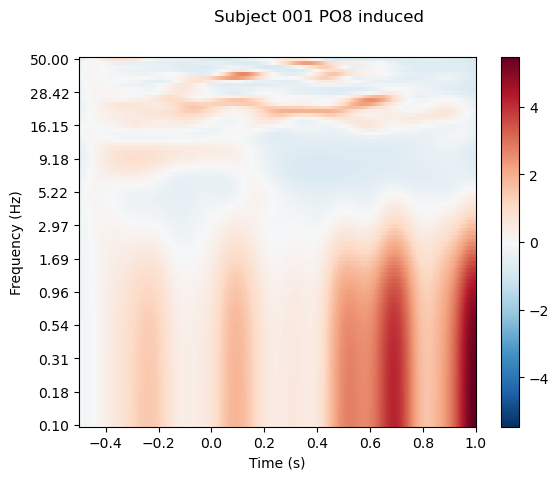

In [21]:
channel = 'PO8'
power_induced_if.plot(cmap=cm.RdBu_r, baseline=baseline,picks=channel,vmin=vmin,vmax=vmax, title='Subject ' + str(sub) +str(' ')+ channel + ' induced')

# Doctests

In [ ]:
def equality(a, b):
    '''
    Test the 2. dimension of intact_faces_epochs and all_but_if_epochs.get_data
    >>> equality(intact_faces_epochs.get_data().shape[1], all_but_if_epochs.get_data().shape[1])
    True

    Test the 3. dimension of intact_faces_epochs and all_but_if_epochs.get_data
    >>> equality(intact_faces_epochs.get_data().shape[2], all_but_if_epochs.get_data().shape[2])
    True
    '''
    return a == b

In [ ]:
def test_save_load(input_array):
    '''
    >>> test_save_load([1, 2, 3, 4, 5])
    True
    
    >>> test_save_load(average_tfr_stim1)
    True
    
    >>> test_save_load(average_tfr_stim2)
    True
    '''
    save_array('./test/test.npy', input_array)
    loaded_array = load_array_from_memory('./test/test.npy')
    
    return np.array_equal(input_array, loaded_array)

In [ ]:
import doctest
doctest.testmod(verbose=True)